# cryptohack challenges  
> https://cryptohack.org/courses/  
> https://cryptohack.org/challenges/

## Introduction 
> https://cryptohack.org/challenges/introduction/

#### Finding Flags

```crypto{y0ur_f1rst_fl4g}```

#### Great Snakes

In [1]:
import sys
# import this

if sys.version_info.major == 2:
    print("You are running Python 2, which is no longer supported. Please update to Python 3.")

ords = [81, 64, 75, 66, 70, 93, 73, 72, 1, 92, 109, 2, 84, 109, 66, 75, 70, 90, 2, 92, 79]

print("Here is your flag:")
print("".join(chr(o ^ 0x32) for o in ords))   # crypto{z3n_0f_pyth0n}

Here is your flag:
crypto{z3n_0f_pyth0n}


#### Network Attacks

In [2]:
import telnetlib
import json

HOST = "socket.cryptohack.org"
PORT = 11112

tn = telnetlib.Telnet(HOST, PORT)


def readline():
    return tn.read_until(b"\n")

def json_recv():
    line = readline()
    return json.loads(line.decode())

def json_send(hsh):
    request = json.dumps(hsh).encode()
    tn.write(request)


print(readline())
print(readline())
print(readline())
print(readline())


request = {
    "buy": "flag"
}
json_send(request)

response = json_recv()

print(response)   # crypto{sh0pp1ng_f0r_fl4g5}

b"Welcome to netcat's flag shop!\n"
b'What would you like to buy?\n'
b"I only speak JSON, I hope that's ok.\n"
b'\n'
{'flag': 'crypto{sh0pp1ng_f0r_fl4g5}'}


## General
> https://cryptohack.org/challenges/general/

### Encoding

#### ASCII

In [3]:
arr = [99, 114, 121, 112, 116, 111, 123, 65, 83, 67, 73, 73, 95, 112, 114, 49, 110, 116, 52, 98, 108, 51, 125]
res = ''.join([chr(i) for i in arr])
res   # crypto{ASCII_pr1nt4bl3}

'crypto{ASCII_pr1nt4bl3}'

In [4]:
arr == [ord(i) for i in res]

True

#### Hex

In [5]:
hexStr = '63727970746f7b596f755f77696c6c5f62655f776f726b696e675f776974685f6865785f737472696e67735f615f6c6f747d'

res = bytes.fromhex(hexStr)
res   # crypto{You_will_be_working_with_hex_strings_a_lot}

b'crypto{You_will_be_working_with_hex_strings_a_lot}'

In [6]:
hexStr == res.hex()

True

#### Base64

In [7]:
import base64

hexStr = '72bca9b68fc16ac7beeb8f849dca1d8a783e8acf9679bf9269f7bf'

res = base64.b64encode( bytes.fromhex(hexStr) )
res   # crypto/Base+64+Encoding+is+Web+Safe/

b'crypto/Base+64+Encoding+is+Web+Safe/'

In [8]:
hexStr == base64.b64decode(res).hex()

True

#### Bytes and Big Integers

In [12]:
from Crypto.Util.number import *

intValue = 11515195063862318899931685488813747395775516287289682636499965282714637259206269

res = long_to_bytes(intValue)
res   # crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}

b'crypto{3nc0d1n6_4ll_7h3_w4y_d0wn}'

In [4]:
intValue == bytes_to_long(res)

True

#### Encoding Challenge

In [11]:
from pwn import * # pip install pwntools
import json
from Crypto.Util.number import bytes_to_long, long_to_bytes
import base64
import codecs
import random

r = remote('socket.cryptohack.org', 13377, level = 'debug')

def json_recv():
    line = r.recvline()
    return json.loads(line.decode())

def json_send(hsh):
    request = json.dumps(hsh).encode()
    r.sendline(request)

def encoding(encoding, challenge_words):
    if encoding == "base64":
        encoded = base64.b64encode(challenge_words.encode()).decode() # wow so encode
    elif encoding == "hex":
        encoded = challenge_words.encode().hex()
    elif encoding == "rot13":
        encoded = codecs.encode(challenge_words, 'rot_13')
    elif encoding == "bigint":
        encoded = hex(bytes_to_long(challenge_words.encode()))
    elif encoding == "utf-8":
        encoded = [ord(b) for b in challenge_words]
    return {"type": encoding, "encoded": encoded}
    
def solve(encoding, encValue):
    if encoding == "base64":
        decoded = base64.b64decode(encValue).decode()
    elif encoding == "hex":
        decoded = bytes.fromhex(encValue).decode()
    elif encoding == "rot13":
        decoded = codecs.decode(encValue, 'rot_13')
    elif encoding == "bigint":
        decoded = long_to_bytes(int(encValue, 16)).decode()  # bytes.fromhex(encValue[2:]).decode()
    elif encoding == "utf-8":
        decoded = ''.join([chr(i) for i in encValue])
    return {"decoded": decoded}

while True :
    received = json_recv()
    print(f"[!] {received}")
    
    if 'flag' in received :
        print(received['flag'])   # crypto{3nc0d3_d3c0d3_3nc0d3}
        break
    
    encoding = received["type"]
    encValue = received["encoded"]
    to_send = solve(encoding, encValue)
    print(f"[+] {to_send}")
    
    json_send(to_send)

[x] Opening connection to socket.cryptohack.org on port 13377
[x] Opening connection to socket.cryptohack.org on port 13377: Trying 134.122.111.232
[+] Opening connection to socket.cryptohack.org on port 13377: Done
[DEBUG] Received 0x50 bytes:
    b'{"type": "bigint", "encoded": "0x62616e5f636f7079696e675f706879736963616c6c79"}\n'
[!] {'type': 'bigint', 'encoded': '0x62616e5f636f7079696e675f706879736963616c6c79'}
[+] {'decoded': 'ban_copying_physically'}
[DEBUG] Sent 0x26 bytes:
    b'{"decoded": "ban_copying_physically"}\n'
[DEBUG] Received 0x59 bytes:
    b'{"type": "hex", "encoded": "70726f6772616d6d65725f6672696461795f70726f706f736974696f6e"}\n'
[!] {'type': 'hex', 'encoded': '70726f6772616d6d65725f6672696461795f70726f706f736974696f6e'}
[+] {'decoded': 'programmer_friday_proposition'}
[DEBUG] Sent 0x2d bytes:
    b'{"decoded": "programmer_friday_proposition"}\n'
[DEBUG] Received 0x70 bytes:
    b'{"type": "utf-8", "encoded": [102, 108, 111, 114, 105, 115, 116, 115, 95, 115, 97, 11

    b'{"decoded": "navy_manual_scripting"}\n'
[DEBUG] Received 0x3e bytes:
    b'{"type": "base64", "encoded": "c3RpY2tlcnNfb3duc19idXJkZW4="}\n'
[!] {'type': 'base64', 'encoded': 'c3RpY2tlcnNfb3duc19idXJkZW4='}
[+] {'decoded': 'stickers_owns_burden'}
[DEBUG] Sent 0x24 bytes:
    b'{"decoded": "stickers_owns_burden"}\n'
[DEBUG] Received 0x36 bytes:
    b'{"type": "rot13", "encoded": "cvnab_jneavatf_flqarl"}\n'
[!] {'type': 'rot13', 'encoded': 'cvnab_jneavatf_flqarl'}
[+] {'decoded': 'piano_warnings_sydney'}
[DEBUG] Sent 0x25 bytes:
    b'{"decoded": "piano_warnings_sydney"}\n'
[DEBUG] Received 0x76 bytes:
    b'{"type": "utf-8", "encoded": [100, 100, 95, 104, 105, 108, 116, 111, 110, 95, 100, 101, 117, 116, 115, 99, 104, 101]}\n'
[!] {'type': 'utf-8', 'encoded': [100, 100, 95, 104, 105, 108, 116, 111, 110, 95, 100, 101, 117, 116, 115, 99, 104, 101]}
[+] {'decoded': 'dd_hilton_deutsche'}
[DEBUG] Sent 0x22 bytes:
    b'{"decoded": "dd_hilton_deutsche"}\n'
[DEBUG] Received 0x5e bytes:
   

    b'{"type": "base64", "encoded": "c2xlZXBpbmdfdGhpbmtzX2hvdA=="}\n'
[!] {'type': 'base64', 'encoded': 'c2xlZXBpbmdfdGhpbmtzX2hvdA=='}
[+] {'decoded': 'sleeping_thinks_hot'}
[DEBUG] Sent 0x23 bytes:
    b'{"decoded": "sleeping_thinks_hot"}\n'
[DEBUG] Received 0x3a bytes:
    b'{"type": "base64", "encoded": "Z2Vhcl9mb3N0ZXJfc3VwZXJi"}\n'
[!] {'type': 'base64', 'encoded': 'Z2Vhcl9mb3N0ZXJfc3VwZXJi'}
[+] {'decoded': 'gear_foster_superb'}
[DEBUG] Sent 0x22 bytes:
    b'{"decoded": "gear_foster_superb"}\n'
[DEBUG] Received 0x53 bytes:
    b'{"type": "hex", "encoded": "73706972697475616c6974795f677265676f72795f6163746f72"}\n'
[!] {'type': 'hex', 'encoded': '73706972697475616c6974795f677265676f72795f6163746f72'}
[+] {'decoded': 'spirituality_gregory_actor'}
[DEBUG] Sent 0x2a bytes:
    b'{"decoded": "spirituality_gregory_actor"}\n'
[DEBUG] Received 0x48 bytes:
    b'{"type": "bigint", "encoded": "0x726f6f74735f7374726f6e6765725f616e79"}\n'
[!] {'type': 'bigint', 'encoded': '0x726f6f74735f73

[!] {'type': 'utf-8', 'encoded': [105, 110, 118, 111, 105, 99, 101, 95, 107, 110, 111, 119, 108, 101, 100, 103, 101, 115, 116, 111, 114, 109, 95, 105, 110, 115, 112, 101, 99, 116, 105, 111, 110]}
[+] {'decoded': 'invoice_knowledgestorm_inspection'}
[DEBUG] Sent 0x31 bytes:
    b'{"decoded": "invoice_knowledgestorm_inspection"}\n'
[DEBUG] Received 0x43 bytes:
    b'{"type": "hex", "encoded": "66756a695f6c6f6767696e675f6275696c74"}\n'
[!] {'type': 'hex', 'encoded': '66756a695f6c6f6767696e675f6275696c74'}
[+] {'decoded': 'fuji_logging_built'}
[DEBUG] Sent 0x22 bytes:
    b'{"decoded": "fuji_logging_built"}\n'
[DEBUG] Received 0x45 bytes:
    b'{"type": "hex", "encoded": "746f70735f6d6f756e7461696e735f6576696c"}\n'
[!] {'type': 'hex', 'encoded': '746f70735f6d6f756e7461696e735f6576696c'}
[+] {'decoded': 'tops_mountains_evil'}
[DEBUG] Sent 0x23 bytes:
    b'{"decoded": "tops_mountains_evil"}\n'
[DEBUG] Received 0x35 bytes:
    b'{"type": "rot13", "encoded": "fuvar_vgharf_vadhvel"}\n'
[!] {'t

### XOR

#### XOR Starter

In [12]:
from pwn import * # pip install pwntools

str = "label"

# xor(str.encode(), 13) 
''.join([chr(ord(i)^13) for i in str])   # crypto{aloha}

'aloha'

#### XOR Properties

```
KEY1 = a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313
KEY2 ^ KEY1 = 37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e
KEY2 ^ KEY3 = c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1
FLAG ^ KEY1 ^ KEY3 ^ KEY2 = 04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf 
```

In [13]:
KEY1 = bytes.fromhex('a6c8b6733c9b22de7bc0253266a3867df55acde8635e19c73313')
KEY2 = xor(KEY1, bytes.fromhex('37dcb292030faa90d07eec17e3b1c6d8daf94c35d4c9191a5e1e'))
KEY3 = xor(KEY2, bytes.fromhex('c1545756687e7573db23aa1c3452a098b71a7fbf0fddddde5fc1'))
FLAG = xor( xor(KEY1,xor(KEY2, KEY3)), bytes.fromhex('04ee9855208a2cd59091d04767ae47963170d1660df7f56f5faf'))
FLAG   # crypto{x0r_i5_ass0c1at1v3}

b'crypto{x0r_i5_ass0c1at1v3}'

#### Favourite byte

In [14]:
s = bytes.fromhex('73626960647f6b206821204f21254f7d694f7624662065622127234f726927756d')

for i in range(256):
    if b'crypto' in xor(s, i) :
        print(f"({i}) {xor(s, i)}")   # crypto{0x10_15_my_f4v0ur173_by7e}

(16) b'crypto{0x10_15_my_f4v0ur173_by7e}'


#### You either know, XOR you don't

In [15]:
s = bytes.fromhex('0e0b213f26041e480b26217f27342e175d0e070a3c5b103e2526217f27342e175d0e077e263451150104')

flag = b'crypto{'

secret = ''
for i in range(len(flag)):
    secret += chr(flag[i]^s[i])
secret += chr(s[-1]^ord('}'))

print(f"secret : {secret}")
xor(s, secret.encode())   # crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}

secret : myXORkey


b'crypto{1f_y0u_Kn0w_En0uGH_y0u_Kn0w_1t_4ll}'

#### Lemur XOR

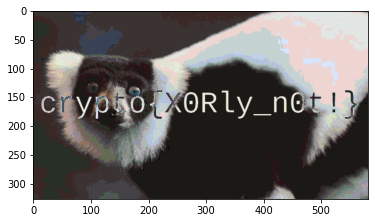

In [16]:
import cv2  
import matplotlib.image as mpimg
import matplotlib.pyplot as plt  
from PIL import Image  
import numpy as np  

lemur = cv2.imread('lemur.png')
flag = cv2.imread('flag.png')

result = np.bitwise_xor(lemur, flag).astype(np.uint8)

plt.imshow( result )   # crypto{X0Rly_n0t!}

### Mathematics

#### Greatest Common Divisor

In [17]:
from math import gcd

def gcd(a,b):
    while b:
        a, b = b, a%b
    return a

a = 66528
b = 52920
gcd(a,b)

1512

#### Extended GCD

In [19]:
import sys
sys.setrecursionlimit(1000000)  # long type, 32bit OS 4B, 64bit OS 8B (1bit for sign)

def egcd(a, b):
    """return (g, x, y) such that a*x + b*y = g = gcd(a, b)"""
    if a == 0:
        return b, 0, 1
    else:
        gcd, x, y = egcd(b % a, a)
        return gcd, y - (b // a) * x, x
    
p = 26513
q = 32321
egcd(p, q)

(1, 10245, -8404)

#### Modular Arithmetic 1

```
11 ≡ x mod 6
8146798528947 ≡ y mod 17 
```

In [20]:
x = 11%6
y = 8146798528947%17
x, y

(5, 4)

#### Modular Arithmetic 2

The integers modulo p define a **field**, denoted **Fp**.
+ If the modulus is not prime, the set of integers modulo n define a **ring**.

A finite field Fp is the set of integers {0,1,...,p-1}, and under both addition and multiplication there is an **inverse** element b for every element a in the set, such that a + b = 0 and a * b = 1.

##### Fermat's little theorem
Fermat's little theorem states that if p is a prime number, then for any integer a, the number $a^p$ − a is an integer multiple of p.
$$
a^{p-1} \equiv 1 \pmod p.
$$

In [1]:
'''
Looking at Fermat's little theorem...
if p is prime, for every integer a:
        pow(a, p) = a mod p
and, if p is prime and a is an integer coprime with p:
        pow(a, p-1) = 1 mod p
So lets check
        pow(273246787654, 65536) mod 65537
Notice that 65536 is exactly 65537-1,
If 273246787654 and 65537 are coprime,
        then the result is one
'''
from math import gcd

a = 273246787654
p = 65537

if gcd(a,p)==1: #a and p are coprime
    print(1)

1


#### Modular Inverting

+ multiplicative inverse of g  
    For all elements g in the field, there exists a unique integer d such that g * d ≡ 1 mod p.

In [ ]:
def modinv(a: int, b: int) -> int:
    """return x such that (x * a) % b == 1"""
    g, x, _ = egcd(a, b)
    if g != 1:
        raise Exception('gcd(a, b) != 1')
    return x % b

modinv(3,13)

### Data Formats

#### Privacy-Enhanced Mail?

In [5]:
from Crypto.PublicKey import RSA
f = open('privacy_enhanced_mail.pem','r')
key = RSA.importKey(f.read())

print(f"RSA private exponent :{key.d}")

RSA private exponent :15682700288056331364787171045819973654991149949197959929860861228180021707316851924456205543665565810892674190059831330231436970914474774562714945620519144389785158908994181951348846017432506464163564960993784254153395406799101314760033445065193429592512349952020982932218524462341002102063435489318813316464511621736943938440710470694912336237680219746204595128959161800595216366237538296447335375818871952520026993102148328897083547184286493241191505953601668858941129790966909236941127851370202421135897091086763569884760099112291072056970636380417349019579768748054760104838790424708988260443926906673795975104689


#### CERTainly not

In [1]:
import json
from OpenSSL import crypto  # $ pip install pyopenssl

certfile = "2048b-rsa-example-cert.der"
with open(certfile, 'rb') as der_file:
    x509 = crypto.load_certificate(crypto.FILETYPE_ASN1, der_file.read())

# This gives you the modulus in integer form
modn = x509.get_pubkey().to_cryptography_key().public_numbers().n

print(f'{modn}')

22825373692019530804306212864609512775374171823993708516509897631547513634635856375624003737068034549047677999310941837454378829351398302382629658264078775456838626207507725494030600516872852306191255492926495965536379271875310457319107936020730050476235278671528265817571433919561175665096171189758406136453987966255236963782666066962654678464950075923060327358691356632908606498231755963567382339010985222623205586923466405809217426670333410014429905146941652293366212903733630083016398810887356019977409467374742266276267137547021576874204809506045914964491063393800499167416471949021995447722415959979785959569497


In [2]:
from Crypto.PublicKey import RSA

with open('2048b-rsa-example-cert.der','rb') as f:
    key = RSA.import_key(f.read())

print(f"RSA certificate modulus: {key.n}")

RSA certificate modulus: 22825373692019530804306212864609512775374171823993708516509897631547513634635856375624003737068034549047677999310941837454378829351398302382629658264078775456838626207507725494030600516872852306191255492926495965536379271875310457319107936020730050476235278671528265817571433919561175665096171189758406136453987966255236963782666066962654678464950075923060327358691356632908606498231755963567382339010985222623205586923466405809217426670333410014429905146941652293366212903733630083016398810887356019977409467374742266276267137547021576874204809506045914964491063393800499167416471949021995447722415959979785959569497


#### SSH Keys

In [3]:
from Crypto.PublicKey import RSA

with open('bruce_rsa.pub','rb') as f:
    key = RSA.import_key(f.read())

print(f"RSA certificate modulus: {key.n}")

RSA certificate modulus: 3931406272922523448436194599820093016241472658151801552845094518579507815990600459669259603645261532927611152984942840889898756532060894857045175300145765800633499005451738872081381267004069865557395638550041114206143085403607234109293286336393552756893984605214352988705258638979454736514997314223669075900783806715398880310695945945147755132919037973889075191785977797861557228678159538882153544717797100401096435062359474129755625453831882490603560134477043235433202708948615234536984715872113343812760102812323180391544496030163653046931414723851374554873036582282389904838597668286543337426581680817796038711228401443244655162199302352017964997866677317161014083116730535875521286631858102768961098851209400973899393964931605067856005410998631842673030901078008408649613538143799959803685041566964514489809211962984534322348394428010908984318940411698961150731204316670646676976361958828528229837610795843145048243492909


#### Transparency

In [2]:
'''
https://crt.sh/?q=cryptohack.org  

    => thetransparencyflagishere.cryptohack.org
    => crypto{thx_redpwn_for_inspiration}
'''
import hashlib
from Crypto.PublicKey import RSA

pem = open('transparency.pem', 'r').read()

key = RSA.importKey(pem).public_key()

der = key.exportKey(format='DER')

sha256 = hashlib.sha256(der)

sha256_fingerprint = sha256.hexdigest()

print(f"Public Key SHA256: {sha256_fingerprint}")

# search censys.io for public key fingerprint to find the associated certificate
# https://censys.io/certificates?q=29ab37df0a4e4d252f0cf12ad854bede59038fdd9cd652cbc5c222edd26d77d2

Public Key SHA256: 29ab37df0a4e4d252f0cf12ad854bede59038fdd9cd652cbc5c222edd26d77d2


## Mathematics

### Modular Math

#### Quadratic Residues

We say that an integer x is a **Quadratic Residue** if there exists an a such that $a^2$ = x mod p. If there is no such solution, then the integer is a **Quadratic Non-Residue**.

In [12]:
p = 29
ints = [14, 6, 11] 

print(min(x for x in range(p) if pow(x,2,p) in ints))

8


#### Legendre Symbol

##### The Legendre Symbol gives an efficient way to determine whether an integer is a quadratic residue modulo an odd prime p.
    (a / p) ≡ $a^{(p-1)/2}$ mod p
    (a / p) = 1 if a is a quadratic residue and a ≢ 0 mod p
    (a / p) = -1 if a is a quadratic non-residue mod p
    (a / p) = 0 if a ≡ 0 mod p 

In [1]:
from sympy import legendre_symbol
from sympy import ntheory 


def Legendre(a, p):  # ntheory.is_quad_residue(a, p)
    res = pow(a, (p - 1) // 2, p)
    return (res-p if res > 1 else res)

p = 101524035174539890485408575671085261788758965189060164484385690801466167356667036677932998889725476582421738788500738738503134356158197247473850273565349249573867251280253564698939768700489401960767007716413932851838937641880157263936985954881657889497583485535527613578457628399173971810541670838543309159139
ints = [25081841204695904475894082974192007718642931811040324543182130088804239047149283334700530600468528298920930150221871666297194395061462592781551275161695411167049544771049769000895119729307495913024360169904315078028798025169985966732789207320203861858234048872508633514498384390497048416012928086480326832803, 45471765180330439060504647480621449634904192839383897212809808339619841633826534856109999027962620381874878086991125854247108359699799913776917227058286090426484548349388138935504299609200377899052716663351188664096302672712078508601311725863678223874157861163196340391008634419348573975841578359355931590555, 17364140182001694956465593533200623738590196990236340894554145562517924989208719245429557645254953527658049246737589538280332010533027062477684237933221198639948938784244510469138826808187365678322547992099715229218615475923754896960363138890331502811292427146595752813297603265829581292183917027983351121325, 14388109104985808487337749876058284426747816961971581447380608277949200244660381570568531129775053684256071819837294436069133592772543582735985855506250660938574234958754211349215293281645205354069970790155237033436065434572020652955666855773232074749487007626050323967496732359278657193580493324467258802863, 4379499308310772821004090447650785095356643590411706358119239166662089428685562719233435615196994728767593223519226235062647670077854687031681041462632566890129595506430188602238753450337691441293042716909901692570971955078924699306873191983953501093343423248482960643055943413031768521782634679536276233318, 85256449776780591202928235662805033201684571648990042997557084658000067050672130152734911919581661523957075992761662315262685030115255938352540032297113615687815976039390537716707854569980516690246592112936796917504034711418465442893323439490171095447109457355598873230115172636184525449905022174536414781771, 50576597458517451578431293746926099486388286246142012476814190030935689430726042810458344828563913001012415702876199708216875020997112089693759638454900092580746638631062117961876611545851157613835724635005253792316142379239047654392970415343694657580353333217547079551304961116837545648785312490665576832987, 96868738830341112368094632337476840272563704408573054404213766500407517251810212494515862176356916912627172280446141202661640191237336568731069327906100896178776245311689857997012187599140875912026589672629935267844696976980890380730867520071059572350667913710344648377601017758188404474812654737363275994871, 4881261656846638800623549662943393234361061827128610120046315649707078244180313661063004390750821317096754282796876479695558644108492317407662131441224257537276274962372021273583478509416358764706098471849536036184924640593888902859441388472856822541452041181244337124767666161645827145408781917658423571721, 18237936726367556664171427575475596460727369368246286138804284742124256700367133250078608537129877968287885457417957868580553371999414227484737603688992620953200143688061024092623556471053006464123205133894607923801371986027458274343737860395496260538663183193877539815179246700525865152165600985105257601565]


quadr_res = ints[ [Legendre(a, p) for a in ints].index(1) ]

# after i've found this i calculate it
# i known that (a / p) == 1, then
# (a / p) * a == a that is
# a **((p - 1) // 2) * a == a that is
# a ** ((p + 1)// 2) == a

# i'm looking for the square root of a mod p, that is the same as
# the square root of a ** ((p + 1)// 2) mod p.
# it is likely that that square root is a ** ((p + 1) // 4) then (just by dividing the denominator by 2)
# which is a good choice because p = 3 mod 4 meaning that there exists
# k such that 4k + 3 = p.
# substituting we bet that 
# a ** ((p + 1) // 4) = a ** ((4k + 3 + 1) // 4) = a ** ((4k + 4) // 4) = a ** (k + 1) which is a valid number
# as it is an integer

pow(quadr_res, ((p+1)//4), p)  # ntheory.nthroot_mod(quadr_res, 2, p, True)

93291799125366706806545638475797430512104976066103610269938025709952247020061090804870186195285998727680200979853848718589126765742550855954805290253592144209552123062161458584575060939481368210688629862036958857604707468372384278049741369153506182660264876115428251983455344219194133033177700490981696141526

#### Modular Square Root

##### Tonelli-Shanks
+ In a congruence of the form $r^2$ ≡ a mod p, Tonelli-Shanks calculates r
+ Tonelli-Shanks doesn't work for composite (non-prime) moduli. Finding square roots modulo composites is computationally equivalent to integer factorization.

In [6]:
a = 8479994658316772151941616510097127087554541274812435112009425778595495359700244470400642403747058566807127814165396640215844192327900454116257979487432016769329970767046735091249898678088061634796559556704959846424131820416048436501387617211770124292793308079214153179977624440438616958575058361193975686620046439877308339989295604537867493683872778843921771307305602776398786978353866231661453376056771972069776398999013769588936194859344941268223184197231368887060609212875507518936172060702209557124430477137421847130682601666968691651447236917018634902407704797328509461854842432015009878011354022108661461024768
p = 30531851861994333252675935111487950694414332763909083514133769861350960895076504687261369815735742549428789138300843082086550059082835141454526618160634109969195486322015775943030060449557090064811940139431735209185996454739163555910726493597222646855506445602953689527405362207926990442391705014604777038685880527537489845359101552442292804398472642356609304810680731556542002301547846635101455995732584071355903010856718680732337369128498655255277003643669031694516851390505923416710601212618443109844041514942401969629158975457079026906304328749039997262960301209158175920051890620947063936347307238412281568760161

def legendre(a, p):
    return pow(a, (p - 1) // 2, p)
 
def tonelli(n, p):
    assert legendre(n, p) == 1, "not a square (mod p)"
    q = p - 1
    s = 0
    while q % 2 == 0:
        q //= 2
        s += 1
    if s == 1:
        return pow(n, (p + 1) // 4, p)
    for z in range(2, p):
        if p - 1 == legendre(z, p):
            break
    c = pow(z, q, p)
    r = pow(n, (q + 1) // 2, p)
    t = pow(n, q, p)
    m = s
    t2 = 0
    while (t - 1) % p != 0:
        t2 = (t * t) % p
        for i in range(1, m):
            if (t2 - 1) % p == 0:
                break
            t2 = (t2 * t2) % p
        b = pow(c, 1 << (m - i - 1), p)
        r = (r * b) % p
        c = (b * b) % p
        t = (t * c) % p
        m = i
    return r

if pow(a,(p-1)//2,p) == 1:
    r = tonelli(a,p)
    assert (r * r - a) % p == 0
    #print("a = %d p = %d" % (a, p))
    #print("\t  roots : %d %d" % (r, p - r))
    print( min(r, p-r) )  # print(min(sympy.ntheory.nthroot_mod(a, 2, p, True)))

2362339307683048638327773298580489298932137505520500388338271052053734747862351779647314176817953359071871560041125289919247146074907151612762640868199621186559522068338032600991311882224016021222672243139362180461232646732465848840425458257930887856583379600967761738596782877851318489355679822813155123045705285112099448146426755110160002515592418850432103641815811071548456284263507805589445073657565381850521367969675699760755310784623577076440037747681760302434924932113640061738777601194622244192758024180853916244427254065441962557282572849162772740798989647948645207349737457445440405057156897508368531939120


#### Chinese Remainder Theorem

In [10]:
"""
x ≡ 2 mod 5
x ≡ 3 mod 11
x ≡ 5 mod 17 

Find the integer a such that x ≡ a mod 935
"""
from functools import reduce

def chinese_remainder(n, a):
    sum = 0
    prod = reduce(lambda a, b: a*b, n)
    for n_i, a_i in zip(n, a):
        p = prod // n_i
        sum += a_i * mul_inv(p, n_i) * p
    return sum % prod

def mul_inv(a, b):
    b0 = b
    x0, x1 = 0, 1
    if b == 1: return 1
    while a > 1:
        q = a // b
        a, b = b, a%b
        x0, x1 = x1 - q * x0, x0
    if x1 < 0: x1 += b0
    return x1

n = [5, 11, 17]
a = [2, 3, 5]
print(chinese_remainder(n, a))

# from sympy.ntheory.modular import solve_congruence
# print(solve_congruence((2, 5), (3, 11), (5, 17)))

872


### Lattices

#### Vectors

In [1]:
"""
v = (2,6,3)
w = (1,0,0)
u = (7,7,2)

calculate 3*(2*v - w) ∙ 2*u. 

3*((4,12,6) - (1,0,0)) . (14,14,4)
3*(3,12,6) . (14,14,4)
(9,36,18) . (14,14,4)|
"""
9*14 + 36*14+18*4

702

#### Size and Basis

In [4]:
"""
v = (4, 6, 2, 5)
||v||2 = v ∙ v
"""
from math import sqrt
sqrt(4*4 + 6*6 + 2*2 + 5*5)

9.0

#### Gram Schmidt

In [29]:
"""
Algorithm for Gram-Schmidt

u1 = v1
Loop i = 2,3...,n
   Compute μij = vi ∙ uj / ||uj||2, 1 ≤ j < i.
   Set ui = vi - μij * uj (Sum over j for 1 ≤ j < i)
End Loop
"""
import numpy as np
from math import sqrt

v = np.array([[4,1,3,-1], [2,1,-3,4], [1,0,-2,7], [6, 2, 9, -5] ])

n = len(v)
mo = np.zeros([n, n], dtype = float)
u = np.zeros(v.shape)

u[0] = v[0]
for i in range(1, n) :
    s = 0
    for j in range(0, i) :
        mo[i,j] = np.dot(v[i], u[j]) / sum(u[j]*u[j])
        s += mo[i,j]*u[j]
    u[i] = v[i] - s

round(u[3, 1], 5)

0.91611

#### What's a Lattice? *

In [32]:
round(abs(np.linalg.det( np.array([[6, 2, -3], [5, 1, 4], [2, 7, 1]]) )))

255

#### Gaussian Reduction

#### Find the Lattice

#### Backpack Cryptography

### Brainteasers Part 1

#### Successive Powers

In [21]:
from Crypto.Util.number import bytes_to_long, isPrime

l = [588, 665, 216, 113, 642, 4, 836, 114, 851, 492, 819, 237]

for p in range(851+1, 1000) :
    if isPrime(p):
        x1 = (665*pow(588, -1, p))%p
        x2 = (216*pow(665, -1, p))%p
        if x1 == x2 :
            print(f"crypto{{{p},{x1}}}")

crypto{919,209}


#### Adrien's Signs

In [26]:
enc = [67594220461269, 501237540280788, 718316769824518, 296304224247167, 48290626940198, 30829701196032, 521453693392074, 840985324383794, 770420008897119, 745131486581197, 729163531979577, 334563813238599, 289746215495432, 538664937794468, 894085795317163, 983410189487558, 863330928724430, 996272871140947, 352175210511707, 306237700811584, 631393408838583, 589243747914057, 538776819034934, 365364592128161, 454970171810424, 986711310037393, 657756453404881, 388329936724352, 90991447679370, 714742162831112, 62293519842555, 653941126489711, 448552658212336, 970169071154259, 339472870407614, 406225588145372, 205721593331090, 926225022409823, 904451547059845, 789074084078342, 886420071481685, 796827329208633, 433047156347276, 21271315846750, 719248860593631, 534059295222748, 879864647580512, 918055794962142, 635545050939893, 319549343320339, 93008646178282, 926080110625306, 385476640825005, 483740420173050, 866208659796189, 883359067574584, 913405110264883, 898864873510337, 208598541987988, 23412800024088, 911541450703474, 57446699305445, 513296484586451, 180356843554043, 756391301483653, 823695939808936, 452898981558365, 383286682802447, 381394258915860, 385482809649632, 357950424436020, 212891024562585, 906036654538589, 706766032862393, 500658491083279, 134746243085697, 240386541491998, 850341345692155, 826490944132718, 329513332018620, 41046816597282, 396581286424992, 488863267297267, 92023040998362, 529684488438507, 925328511390026, 524897846090435, 413156582909097, 840524616502482, 325719016994120, 402494835113608, 145033960690364, 43932113323388, 683561775499473, 434510534220939, 92584300328516, 763767269974656, 289837041593468, 11468527450938, 628247946152943, 8844724571683, 813851806959975, 72001988637120, 875394575395153, 70667866716476, 75304931994100, 226809172374264, 767059176444181, 45462007920789, 472607315695803, 325973946551448, 64200767729194, 534886246409921, 950408390792175, 492288777130394, 226746605380806, 944479111810431, 776057001143579, 658971626589122, 231918349590349, 699710172246548, 122457405264610, 643115611310737, 999072890586878, 203230862786955, 348112034218733, 240143417330886, 927148962961842, 661569511006072, 190334725550806, 763365444730995, 516228913786395, 846501182194443, 741210200995504, 511935604454925, 687689993302203, 631038090127480, 961606522916414, 138550017953034, 932105540686829, 215285284639233, 772628158955819, 496858298527292, 730971468815108, 896733219370353, 967083685727881, 607660822695530, 650953466617730, 133773994258132, 623283311953090, 436380836970128, 237114930094468, 115451711811481, 674593269112948, 140400921371770, 659335660634071, 536749311958781, 854645598266824, 303305169095255, 91430489108219, 573739385205188, 400604977158702, 728593782212529, 807432219147040, 893541884126828, 183964371201281, 422680633277230, 218817645778789, 313025293025224, 657253930848472, 747562211812373, 83456701182914, 470417289614736, 641146659305859, 468130225316006, 46960547227850, 875638267674897, 662661765336441, 186533085001285, 743250648436106, 451414956181714, 527954145201673, 922589993405001, 242119479617901, 865476357142231, 988987578447349, 430198555146088, 477890180119931, 844464003254807, 503374203275928, 775374254241792, 346653210679737, 789242808338116, 48503976498612, 604300186163323, 475930096252359, 860836853339514, 994513691290102, 591343659366796, 944852018048514, 82396968629164, 152776642436549, 916070996204621, 305574094667054, 981194179562189, 126174175810273, 55636640522694, 44670495393401, 74724541586529, 988608465654705, 870533906709633, 374564052429787, 486493568142979, 469485372072295, 221153171135022, 289713227465073, 952450431038075, 107298466441025, 938262809228861, 253919870663003, 835790485199226, 655456538877798, 595464842927075, 191621819564547]

def legendre(a, p):
    return pow(a, (p - 1) // 2, p)

a = 288260533169915
p = 1007621497415251

f = ""
for i in enc :
    if legendre(i, p)==1 :
        f += "1"
    else :
        f += "0"

''.join( [chr(int(f[i*8:i*8+8], 2)) for i in range(0, len(f)//8)] )

'crypto{p4tterns_1n_re5idu3s}'

#### Modular Binomials

In [31]:
"""
N = p*q
c1 = (2*p + 3*q)**e1 mod N
c2 = (5*p + 7*q)**e2 mod N 
"""
N = 14905562257842714057932724129575002825405393502650869767115942606408600343380327866258982402447992564988466588305174271674657844352454543958847568190372446723549627752274442789184236490768272313187410077124234699854724907039770193680822495470532218905083459730998003622926152590597710213127952141056029516116785229504645179830037937222022291571738973603920664929150436463632305664687903244972880062028301085749434688159905768052041207513149370212313943117665914802379158613359049957688563885391972151218676545972118494969247440489763431359679770422939441710783575668679693678435669541781490217731619224470152467768073
e1 = 12886657667389660800780796462970504910193928992888518978200029826975978624718627799215564700096007849924866627154987365059524315097631111242449314835868137
e2 = 12110586673991788415780355139635579057920926864887110308343229256046868242179445444897790171351302575188607117081580121488253540215781625598048021161675697
c1 = 14010729418703228234352465883041270611113735889838753433295478495763409056136734155612156934673988344882629541204985909650433819205298939877837314145082403528055884752079219150739849992921393509593620449489882380176216648401057401569934043087087362272303101549800941212057354903559653373299153430753882035233354304783275982332995766778499425529570008008029401325668301144188970480975565215953953985078281395545902102245755862663621187438677596628109967066418993851632543137353041712721919291521767262678140115188735994447949166616101182806820741928292882642234238450207472914232596747755261325098225968268926580993051
c2 = 14386997138637978860748278986945098648507142864584111124202580365103793165811666987664851210230009375267398957979494066880296418013345006977654742303441030008490816239306394492168516278328851513359596253775965916326353050138738183351643338294802012193721879700283088378587949921991198231956871429805847767716137817313612304833733918657887480468724409753522369325138502059408241232155633806496752350562284794715321835226991147547651155287812485862794935695241612676255374480132722940682140395725089329445356434489384831036205387293760789976615210310436732813848937666608611803196199865435145094486231635966885932646519

from factordb.factordb import FactorDB

f = FactorDB(N)
f.connect()
p, q = f.get_factor_list()

f"crypto{{{p},{q}}}"

'crypto{112274000169258486390262064441991200608556376127408952701514962644340921899196091557519382763356534106376906489445103255177593594898966250176773605432765983897105047795619470659157057093771407309168345670541418772427807148039207489900810013783673957984006269120652134007689272484517805398390277308001719431273,132760587806365301971479157072031448380135765794466787456948786731168095877956875295282661565488242190731593282663694728914945967253173047324353981530949360031535707374701705328450856944598803228299967009004598984671293494375599408764139743217465012770376728876547958852025425539298410751132782632817947101601}'

#### Broken RSA

In [32]:
n = 27772857409875257529415990911214211975844307184430241451899407838750503024323367895540981606586709985980003435082116995888017731426634845808624796292507989171497629109450825818587383112280639037484593490692935998202437639626747133650990603333094513531505209954273004473567193235535061942991750932725808679249964667090723480397916715320876867803719301313440005075056481203859010490836599717523664197112053206745235908610484907715210436413015546671034478367679465233737115549451849810421017181842615880836253875862101545582922437858358265964489786463923280312860843031914516061327752183283528015684588796400861331354873
e = 16
ct = 11303174761894431146735697569489134747234975144162172162401674567273034831391936916397234068346115459134602443963604063679379285919302225719050193590179240191429612072131629779948379821039610415099784351073443218911356328815458050694493726951231241096695626477586428880220528001269746547018741237131741255022371957489462380305100634600499204435763201371188769446054925748151987175656677342779043435047048130599123081581036362712208692748034620245590448762406543804069935873123161582756799517226666835316588896306926659321054276507714414876684738121421124177324568084533020088172040422767194971217814466953837590498718

#### No Way Back Home

## Symmetric Ciphers

### How AES Works

#### Keyed Permutations

+ What is the mathematical term for a one-to-one correspondence?
- crypto{Bijection}

#### Resisting Bruteforce

Finally, while quantum computers have the potential to completely break popular public-key cryptosystems like RSA via [**Shor's algorithm**](https://en.wikipedia.org/wiki/Shor%27s_algorithm), they are thought to only cut in half the security level of symmetric cryptosystems via [**Grover's algorithm**](https://en.wikipedia.org/wiki/Grover's_algorithm). This is one reason why people recommend using AES-256, despite it being less performant, as it would still provide a very adequate 128 bits of security in a quantum future.  
 
+ What is the name for the best single-key attack against AES? 
+ crypto{[Biclique](https://en.wikipedia.org/wiki/Biclique_attack)}

#### Structure of AES

In [1]:
def bytes2matrix(text):
    """ Converts a 16-byte array into a 4x4 matrix.  """
    return [list(text[i:i+4]) for i in range(0, len(text), 4)]

def matrix2bytes(matrix):
    """ Converts a 4x4 matrix into a 16-byte array.  """
    return ''.join([chr(b) for row in matrix for b in row]).encode()

matrix = [
    [99, 114, 121, 112],
    [116, 111, 123, 105],
    [110, 109, 97, 116],
    [114, 105, 120, 125],
]

print(matrix2bytes(matrix))

b'crypto{inmatrix}'


#### Round Keys

In [8]:
state = [
    [206, 243, 61, 34],
    [171, 11, 93, 31],
    [16, 200, 91, 108],
    [150, 3, 194, 51],
]

round_key = [
    [173, 129, 68, 82],
    [223, 100, 38, 109],
    [32, 189, 53, 8],
    [253, 48, 187, 78],
]


def add_round_key(state, round_key):
    return [ [v1^v2 for v1, v2 in zip(st, rkey)] for st, rkey in zip(state, round_key)]


print(matrix2bytes( add_round_key(state, round_key) ))

b'crypto{r0undk3y}'


#### Confusion through Substitution

In [9]:
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

state = [
    [251, 64, 182, 81],
    [146, 168, 33, 80],
    [199, 159, 195, 24],
    [64, 80, 182, 255],
]


def sub_bytes(s, sbox=s_box):
    return [[sbox[item] for item in row] for row in s]


print(matrix2bytes( sub_bytes(state, sbox=inv_s_box)) )

b'crypto{l1n34rly}'


#### Diffusion through Permutation

In [11]:
def shift_rows(s):
    s[0][1], s[1][1], s[2][1], s[3][1] = s[1][1], s[2][1], s[3][1], s[0][1]
    s[0][2], s[1][2], s[2][2], s[3][2] = s[2][2], s[3][2], s[0][2], s[1][2]
    s[0][3], s[1][3], s[2][3], s[3][3] = s[3][3], s[0][3], s[1][3], s[2][3]


def inv_shift_rows(s):
    s[1][1], s[2][1], s[3][1], s[0][1] = s[0][1], s[1][1], s[2][1], s[3][1]
    s[2][2], s[3][2], s[0][2], s[1][2] = s[0][2], s[1][2], s[2][2], s[3][2]
    s[3][3], s[0][3], s[1][3], s[2][3] = s[0][3], s[1][3], s[2][3], s[3][3]


# learned from http://cs.ucsb.edu/~koc/cs178/projects/JT/aes.c
xtime = lambda a: (((a << 1) ^ 0x1B) & 0xFF) if (a & 0x80) else (a << 1)


def mix_single_column(a):
    # see Sec 4.1.2 in The Design of Rijndael
    t = a[0] ^ a[1] ^ a[2] ^ a[3]
    u = a[0]
    a[0] ^= t ^ xtime(a[0] ^ a[1])
    a[1] ^= t ^ xtime(a[1] ^ a[2])
    a[2] ^= t ^ xtime(a[2] ^ a[3])
    a[3] ^= t ^ xtime(a[3] ^ u)


def mix_columns(s):
    for i in range(4):
        mix_single_column(s[i])


def inv_mix_columns(s):
    # see Sec 4.1.3 in The Design of Rijndael
    for i in range(4):
        u = xtime(xtime(s[i][0] ^ s[i][2]))
        v = xtime(xtime(s[i][1] ^ s[i][3]))
        s[i][0] ^= u
        s[i][1] ^= v
        s[i][2] ^= u
        s[i][3] ^= v

    mix_columns(s)


state = [
    [108, 106, 71, 86],
    [96, 62, 38, 72],
    [42, 184, 92, 209],
    [94, 79, 8, 54],
]

inv_mix_columns(state)
inv_shift_rows(state)
matrix2bytes(state)

b'crypto{d1ffUs3R}'

#### Bringing It All Together

In [13]:
N_ROUNDS = 10

key        = b'\xc3,\\\xa6\xb5\x80^\x0c\xdb\x8d\xa5z*\xb6\xfe\\'
ciphertext = b'\xd1O\x14j\xa4+O\xb6\xa1\xc4\x08B)\x8f\x12\xdd'



def expand_key(master_key):
    """
    Expands and returns a list of key matrices for the given master_key.
    """

    # Round constants https://en.wikipedia.org/wiki/AES_key_schedule#Round_constants
    r_con = (
        0x00, 0x01, 0x02, 0x04, 0x08, 0x10, 0x20, 0x40,
        0x80, 0x1B, 0x36, 0x6C, 0xD8, 0xAB, 0x4D, 0x9A,
        0x2F, 0x5E, 0xBC, 0x63, 0xC6, 0x97, 0x35, 0x6A,
        0xD4, 0xB3, 0x7D, 0xFA, 0xEF, 0xC5, 0x91, 0x39,
    )

    # Initialize round keys with raw key material.
    key_columns = bytes2matrix(master_key)
    iteration_size = len(master_key) // 4

    # Each iteration has exactly as many columns as the key material.
    i = 1
    while len(key_columns) < (N_ROUNDS + 1) * 4:
        # Copy previous word.
        word = list(key_columns[-1])

        # Perform schedule_core once every "row".
        if len(key_columns) % iteration_size == 0:
            # Circular shift.
            word.append(word.pop(0))
            # Map to S-BOX.
            word = [s_box[b] for b in word]
            # XOR with first byte of R-CON, since the others bytes of R-CON are 0.
            word[0] ^= r_con[i]
            i += 1
        elif len(master_key) == 32 and len(key_columns) % iteration_size == 4:
            # Run word through S-box in the fourth iteration when using a
            # 256-bit key.
            word = [s_box[b] for b in word]

        # XOR with equivalent word from previous iteration.
        word = bytes(i^j for i, j in zip(word, key_columns[-iteration_size]))
        key_columns.append(word)

    # Group key words in 4x4 byte matrices.
    return [key_columns[4*i : 4*(i+1)] for i in range(len(key_columns) // 4)]


def decrypt(key, ciphertext):
    round_keys = expand_key(key) # Remember to start from the last round key and work backwards through them when decrypting

    # Convert ciphertext to state matrix
    state = bytes2matrix(ciphertext)
    
    # Initial add round key step
    state = add_round_key(state, round_keys[-1])

    for i in range(N_ROUNDS - 1, 0, -1):
        inv_shift_rows(state)
        state = sub_bytes(state, sbox=inv_s_box)
        state = add_round_key(state, round_keys[i])
        inv_mix_columns(state)
        # pass # Do round

    # Run final round (skips the InvMixColumns step)
    inv_shift_rows(state)
    state = sub_bytes(state, sbox=inv_s_box)
    state = add_round_key(state, round_keys[0])
        
    # Convert state matrix to plaintext
    plaintext = matrix2bytes(state)
    
    return plaintext


print(decrypt(key, ciphertext))

b'crypto{MYAES128}'


### Symmetric Starter

#### Modes of Operation Starter

+ http://aes.cryptohack.org/block_cipher_starter/
> crypto{bl0ck_c1ph3r5_4r3_f457_!}

#### Passwords as Keys

In [15]:
import requests
from Crypto.Cipher import AES
import hashlib
import random
import json

BASE_URL = "http://aes.cryptohack.org/passwords_as_keys/"

# 1) get the ciphertext of the encrypted flag
r = requests.get(f"{BASE_URL}/encrypt_flag")
data = r.json()
ciphertext = data["ciphertext"]
print("ciphertext", ciphertext)

ciphertext = bytes.fromhex(ciphertext)

# https://gist.githubusercontent.com/wchargin/8927565/raw/d9783627c731268fb2935a731a618aa8e95cf465/words
with open("./words") as f:
    words = [w.strip() for w in f.readlines()]

for keyword in words :
    password_hash = hashlib.md5(keyword.encode()).digest()
    cipher = AES.new(password_hash, AES.MODE_ECB)
    try:
        decrypted = cipher.decrypt(ciphertext)
    except ValueError as e:
        print(e)
    if b'crypto' in decrypted :
        #print(f"flag = {decrypted}")
        # 2) send the ciphertext to the decrypt function
        r = requests.get(f"{BASE_URL}/decrypt/{ciphertext.hex()}/{password_hash.hex()}")
        data = r.json()
        plaintext = data["plaintext"]
        print("plaintext", plaintext)
        break
        
# 3) convert from hex to ASCII to have the flag
print("flag", bytearray.fromhex(plaintext).decode())

ciphertext c92b7734070205bdf6c0087a751466ec13ae15e6f1bcdd3f3a535ec0f4bbae66
plaintext 63727970746f7b6b3379355f5f725f5f6e30375f5f70343535773072647a3f7d
flag crypto{k3y5__r__n07__p455w0rdz?}


### Block Ciphers

#### ECB CBC WTF

#### ECB Oracle

In [108]:
import requests
from Crypto.Cipher import AES
import hashlib
import random
import json

BASE_URL = "http://aes.cryptohack.org/ecb_oracle/"

def exploit() :
    know = b"crypto{p3n6u1n5_h473_3cb"
    for i in range(31-len(know),6,-1) :  
        payload = b'a'*i
        real = requests.get(f"{BASE_URL}//encrypt/{payload.hex()}").json()["ciphertext"][:64]
        for j in range(0x20, 0x80):
            snd = payload + know + int.to_bytes(j, length=1, byteorder='big', signed=False)
            #print(f"flag = {snd}")
            res = requests.get(f"{BASE_URL}//encrypt/{snd.hex()}").json()["ciphertext"][:64]
            if res == real :
                know += int.to_bytes(j, length=1, byteorder='big', signed=False)
                print(know)
                break
        
exploit()  # crypto{p3n6u1n5_h473_3cb}

b'crypto{p3n6u1n5_h473_3cb}'


#### ECB CBC WTF

In [135]:
from Crypto.Cipher import AES
import os
from pwn import *

BASE_URL = "http://aes.cryptohack.org/ecbcbcwtf"

# 1) get the ciphertext of the encrypted flag
encryptedFlag = requests.get(f"{BASE_URL}/encrypt_flag").json()["ciphertext"]
print("ciphertext", encryptedFlag)
#ciphertext = bytes.fromhex(ciphertext)

iv = bytes.fromhex(encryptedFlag[:32])

decryptedFlag1 = requests.get(f"{BASE_URL}/decrypt/{encryptedFlag[32:64]}").json()["plaintext"]
p1 = xor(iv,  bytes.fromhex(decryptedFlag1) )

decryptedFlag2 = requests.get(f"{BASE_URL}/decrypt/{encryptedFlag[64:96]}").json()["plaintext"]
p2 = xor(bytes.fromhex(encryptedFlag[32:64]),  bytes.fromhex(decryptedFlag2) )

print(f"[!] flag = {p1+p2}")

ciphertext a98d4f0d93ae4d764abb66101d919ad64603f8616b5bd6a88fadd63de402e995ee82689f1b9ae2cb6157e725d463cc97
[!] flag = b'crypto{3cb_5uck5_4v01d_17_!!!!!}'


#### Flipping Cookie`